In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For linear model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Ridge, Lasso, ElasticNet
# For the polynomial model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

**1. Read in data**

In [2]:
amesc = pd.read_csv('./datasets/ames_train_cleaned.csv')

In [3]:
amesc.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,72.774648,13517,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0.0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No pool,No fence,No Misc feature,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,3.0,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No pool,No fence,No Misc feature,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0.0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No pool,No fence,No Misc feature,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0.0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,No pool,No fence,No Misc feature,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0.0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,No pool,No fence,No Misc feature,0,3,2010,WD,138500


In [225]:
amesc.shape

(2041, 81)

**2. Separate data based on datatypes**

In [ ]:
# Viewing numerical data only
amesc.iloc[:,2:].select_dtypes(np.number).head(2)

In [4]:
# Viewing all the columns except ID and PID
amesc.columns[2:]

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [5]:
# Trying to change all possible continuous columns to float and discrete columns to int

for i in amesc.columns[2:]:
    if (amesc[i].dtypes == 'int64') | (amesc[i].dtypes == 'float64'):
        if len(amesc[i].value_counts()) > 20: 
            amesc[i] = amesc[i].astype(float)
        else:
            amesc[i] = amesc[i].astype(int)
        print(i,":", amesc[i].dtypes,"\n", "Value_Counts:", len(amesc[i].value_counts()),'\n')

MS SubClass : int32 
 Value_Counts: 16 

Lot Frontage : float64 
 Value_Counts: 141 

Lot Area : float64 
 Value_Counts: 1467 

Overall Qual : int32 
 Value_Counts: 10 

Overall Cond : int32 
 Value_Counts: 9 

Year Built : float64 
 Value_Counts: 113 

Year Remod/Add : float64 
 Value_Counts: 61 

Mas Vnr Area : float64 
 Value_Counts: 370 

BsmtFin SF 1 : float64 
 Value_Counts: 818 

BsmtFin SF 2 : float64 
 Value_Counts: 205 

Bsmt Unf SF : float64 
 Value_Counts: 965 

Total Bsmt SF : float64 
 Value_Counts: 890 

1st Flr SF : float64 
 Value_Counts: 911 

2nd Flr SF : float64 
 Value_Counts: 503 

Low Qual Fin SF : float64 
 Value_Counts: 31 

Gr Liv Area : float64 
 Value_Counts: 1048 

Bsmt Full Bath : int32 
 Value_Counts: 4 

Bsmt Half Bath : int32 
 Value_Counts: 3 

Full Bath : int32 
 Value_Counts: 5 

Half Bath : int32 
 Value_Counts: 3 

Bedroom AbvGr : int32 
 Value_Counts: 8 

Kitchen AbvGr : int32 
 Value_Counts: 4 

TotRms AbvGrd : int32 
 Value_Counts: 13 

Fireplac

In [6]:
# Changing year back to int 

for i in amesc.columns[2:]:
    if 'Year' in i: 
        amesc[i] = amesc[i].astype(int)

In [7]:
# Viewing data type and value counts for each column 
for i in amesc.columns:
    print(i,":", amesc[i].dtypes,"\n", "Value_Counts:", len(amesc[i].value_counts()),'\n')

Id : int64 
 Value_Counts: 2041 

PID : int64 
 Value_Counts: 2041 

MS SubClass : int32 
 Value_Counts: 16 

MS Zoning : object 
 Value_Counts: 7 

Lot Frontage : float64 
 Value_Counts: 141 

Lot Area : float64 
 Value_Counts: 1467 

Street : object 
 Value_Counts: 2 

Alley : object 
 Value_Counts: 3 

Lot Shape : object 
 Value_Counts: 4 

Land Contour : object 
 Value_Counts: 4 

Utilities : object 
 Value_Counts: 3 

Lot Config : object 
 Value_Counts: 5 

Land Slope : object 
 Value_Counts: 3 

Neighborhood : object 
 Value_Counts: 26 

Condition 1 : object 
 Value_Counts: 9 

Condition 2 : object 
 Value_Counts: 8 

Bldg Type : object 
 Value_Counts: 5 

House Style : object 
 Value_Counts: 8 

Overall Qual : int32 
 Value_Counts: 10 

Overall Cond : int32 
 Value_Counts: 9 

Year Built : int32 
 Value_Counts: 113 

Year Remod/Add : int32 
 Value_Counts: 61 

Roof Style : object 
 Value_Counts: 6 

Roof Matl : object 
 Value_Counts: 5 

Exterior 1st : object 
 Value_Counts: 15 

In [8]:
amesc.select_dtypes('float').head(2)

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,SalePrice
0,72.774648,13517.0,289.0,533.0,0.0,192.0,725.0,725.0,754.0,0.0,1479.0,475.0,0.0,44.0,0.0,0.0,0.0,0.0,130500.0
1,43.000000,11492.0,132.0,637.0,0.0,276.0,913.0,913.0,1209.0,0.0,2122.0,559.0,0.0,74.0,0.0,0.0,0.0,0.0,220000.0


In [9]:
amesc.select_dtypes('int').head(2)

,MS SubClass,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Cars,Pool Area,Mo Sold,Yr Sold
0,60,6,8,1976,2005,0,0,2,1,3,1,6,0,0,2,0,3,2010
1,60,7,5,1996,1997,1,0,2,1,4,1,8,1,3,2,0,4,2009


In [10]:
amesc.select_dtypes('object').head(2)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,1976.0,RFn,TA,TA,Y,No pool,No fence,No Misc feature,WD
1,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,1997.0,RFn,TA,TA,Y,No pool,No fence,No Misc feature,WD


In [11]:
category = []
for i in amesc.columns:  
    if (amesc[i].dtypes == 'int64') | (amesc[i].dtypes != 'float64'):
        category.append(i)
        
category[:5]

['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street']

In [12]:
# Ordinal variables will be all variables that have ranking 
amesc_ord = amesc[['Overall Qual',
 'Overall Cond','Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
 'BsmtFin Type 2','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
 'Garage Cond','Pool QC']]
amesc_ord['SalePrice'] = amesc['SalePrice']
amesc_ord.head()
amesc_ord.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(2041, 16)

    There are 16 ordinal varibles to feature engineer

In [13]:
# Nominal variables will be all variables that do not have a ranking - Eg. Good, Average, Poor
amesc_nom = amesc[['MS SubClass','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Year Built','Year Remod/Add','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Electrical','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Functional','Fireplaces','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Paved Drive','Fence','Misc Feature','Mo Sold','Yr Sold','Sale Type']]
amesc_nom['SalePrice'] = amesc['SalePrice']
amesc_nom.head()
amesc_nom.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2041, 45)

    There are 45 nominal variables to feature engineer

**3. Find correlation for continuous data**
- Heatmap

In [14]:
amesc_cont = amesc.select_dtypes('float')

In [15]:
amesc_cont.head(3)

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,SalePrice
0,72.774648,13517.0,289.0,533.0,0.0,192.0,725.0,725.0,754.0,0.0,1479.0,475.0,0.0,44.0,0.0,0.0,0.0,0.0,130500.0
1,43.000000,11492.0,132.0,637.0,0.0,276.0,913.0,913.0,1209.0,0.0,2122.0,559.0,0.0,74.0,0.0,0.0,0.0,0.0,220000.0
2,68.000000,7922.0,0.0,731.0,0.0,326.0,1057.0,1057.0,0.0,0.0,1057.0,246.0,0.0,52.0,0.0,0.0,0.0,0.0,109000.0


In [226]:
amesc_cont.shape

(2041, 19)

    There are 19 continuous variables for us to feature engineer 

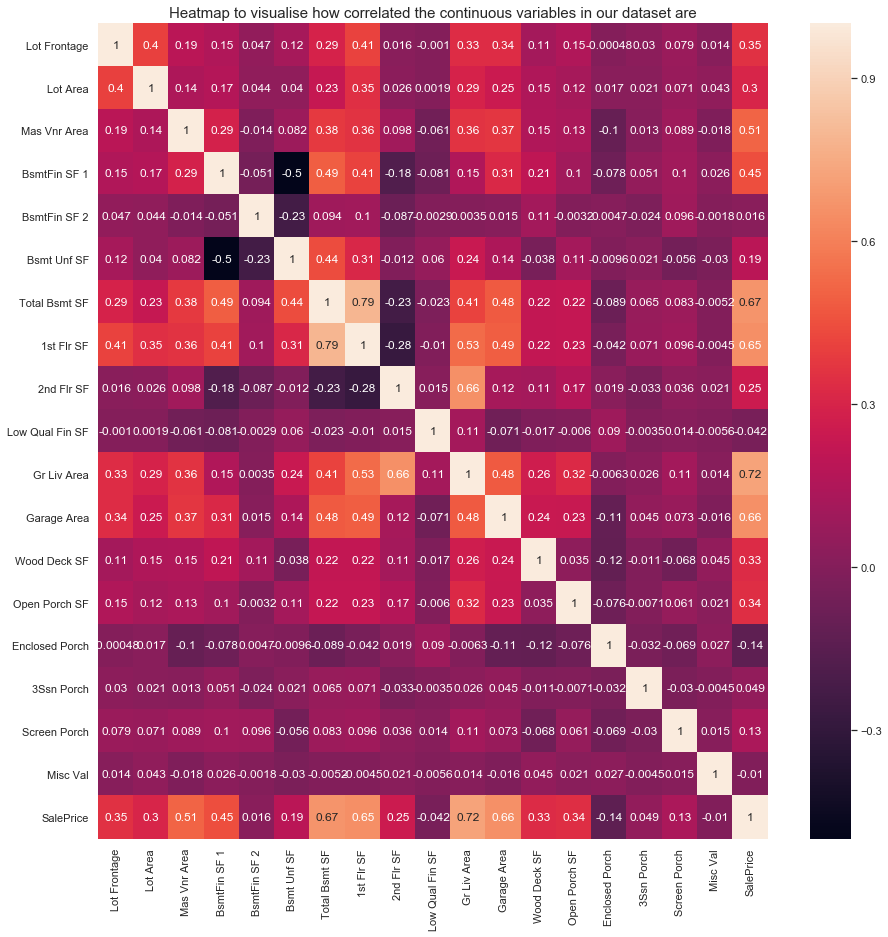

In [16]:
sns.set(font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(amesc_cont.corr(), annot = True);
plt.title("Heatmap to visualise how correlated the continuous variables in our dataset are", fontsize=15);

In [17]:
cont_corr = abs(amesc_cont.corr()['SalePrice'])
cont_features = cont_corr[cont_corr>0.5]
cont_features

Mas Vnr Area     0.512318
Total Bsmt SF    0.666607
1st Flr SF       0.648446
Gr Liv Area      0.720308
Garage Area      0.657363
SalePrice        1.000000
Name: SalePrice, dtype: float64

    Our heatmap and correlation coefficient shows us that the continuous 
    variables to consider in generating our base model should be:
    - Mas Vnr Area     
    - Total Bsmt SF   
    - 1st Flr SF      
    - Gr Liv Area     
    - Garage Area

**4. Find correlation for ordinal data**
- Heatmap

In [18]:
print(amesc_ord.shape)
amesc_ord.head(3)

(2041, 16)


,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,SalePrice
0,6,8,Gd,TA,TA,TA,No,GLQ,Unf,Ex,Gd,0,TA,TA,No pool,130500.0
1,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,3,TA,TA,No pool,220000.0
2,5,7,TA,Gd,TA,TA,No,GLQ,Unf,TA,Gd,0,TA,TA,No pool,109000.0


    There are 16 columns with ordinal variables and 2041 rows
    To find correlation of them with Sales Price:
        1. Convert the string to numerical ranking 
        2. Drop rows that contain at least 1 data point without a numerical ranking

In [19]:
cat_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for i in amesc_ord.columns:
    if ('Overall' not in i) & (('Qual' in i) | ('Cond' in i) | ('QC' in i)):
        amesc_ord[i].replace(cat_dict,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
amesc_ord['Bsmt Exposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1},inplace=True)

In [21]:
bscat_dict = {'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
amesc_ord['BsmtFin Type 1'].replace(bscat_dict,inplace=True)
amesc_ord['BsmtFin Type 2'].replace(bscat_dict,inplace=True)

In [22]:
amesc_ord.head(2)

,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,SalePrice
0,6,8,4,3,3,3,1,6,1,5,4,0,3,3,No pool,130500.0
1,7,5,4,3,4,3,1,6,1,5,4,3,3,3,No pool,220000.0


In [23]:
for i in amesc_ord.columns:
    print(i, amesc_ord[i].value_counts())

Overall Qual 5     561
6     505
7     428
8     249
4     158
9      77
3      29
10     21
2       9
1       4
Name: Overall Qual, dtype: int64
Overall Cond 5    1160
6     367
7     269
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64
Exter Qual 3    1244
4     692
5      79
2      26
Name: Exter Qual, dtype: int64
Exter Cond 3    1768
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64
Bsmt Qual 3          887
4          858
5          182
2           60
No Bsmt     53
1            1
Name: Bsmt Qual, dtype: int64
Bsmt Cond 3          1826
4            89
2            65
No Bsmt      53
1             5
5             3
Name: Bsmt Cond, dtype: int64
Bsmt Exposure 1          1336
3           288
4           201
2           163
No Bsmt      53
Name: Bsmt Exposure, dtype: int64
BsmtFin Type 1 6          611
1          600
5          292
4          200
3          183
2          102
No Bsmt     53
Name: BsmtFin Type 1, dtype: i

In [24]:
amesc_ord.replace('No Bsmt',0,inplace=True)
amesc_ord.replace('No Garage',0,inplace=True)
amesc_ord.replace('No pool',0,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
for i in amesc_ord.columns:
    print(i, amesc_ord[i].value_counts())

Overall Qual 5     561
6     505
7     428
8     249
4     158
9      77
3      29
10     21
2       9
1       4
Name: Overall Qual, dtype: int64
Overall Cond 5    1160
6     367
7     269
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64
Exter Qual 3    1244
4     692
5      79
2      26
Name: Exter Qual, dtype: int64
Exter Cond 3    1768
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64
Bsmt Qual 3    887
4    858
5    182
2     60
0     53
1      1
Name: Bsmt Qual, dtype: int64
Bsmt Cond 3    1826
4      89
2      65
0      53
1       5
5       3
Name: Bsmt Cond, dtype: int64
Bsmt Exposure 1    1336
3     288
4     201
2     163
0      53
Name: Bsmt Exposure, dtype: int64
BsmtFin Type 1 6    611
1    600
5    292
4    200
3    183
2    102
0     53
Name: BsmtFin Type 1, dtype: int64
BsmtFin Type 2 1    1742
3      80
2      60
0      53
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64
Heating QC 5    105

In [26]:
amesc_ord0 = amesc_ord[~(amesc_ord == 0).any(axis = 1)]

In [27]:
for i in amesc_ord0.columns:
    print(i, amesc_ord0[i].value_counts())

Overall Qual 6    3
7    2
4    1
8    1
Name: Overall Qual, dtype: int64
Overall Cond 6    3
5    2
7    1
4    1
Name: Overall Cond, dtype: int64
Exter Qual 3    4
4    3
Name: Exter Qual, dtype: int64
Exter Cond 3    5
4    1
2    1
Name: Exter Cond, dtype: int64
Bsmt Qual 4    4
3    3
Name: Bsmt Qual, dtype: int64
Bsmt Cond 3    7
Name: Bsmt Cond, dtype: int64
Bsmt Exposure 1    4
3    2
4    1
Name: Bsmt Exposure, dtype: int64
BsmtFin Type 1 5    3
4    2
1    2
Name: BsmtFin Type 1, dtype: int64
BsmtFin Type 2 1    3
2    2
4    1
3    1
Name: BsmtFin Type 2, dtype: int64
Heating QC 4    3
3    3
2    1
Name: Heating QC, dtype: int64
Kitchen Qual 4    5
3    2
Name: Kitchen Qual, dtype: int64
Fireplace Qu 4    2
3    2
2    2
1    1
Name: Fireplace Qu, dtype: int64
Garage Qual 3    5
4    2
Name: Garage Qual, dtype: int64
Garage Cond 3    5
4    2
Name: Garage Cond, dtype: int64
Pool QC 4    3
2    2
5    1
3    1
Name: Pool QC, dtype: int64
SalePrice 315000.0    1
171000.0    1

    My aim was to remove all rows containing 0 (meaning the lack of the variable - eg. No basement) and to see the correlation matrix. However, after removing, I realise that I only have 7 rows left 
    - The reason to this is because there are only 7 observations with Pool

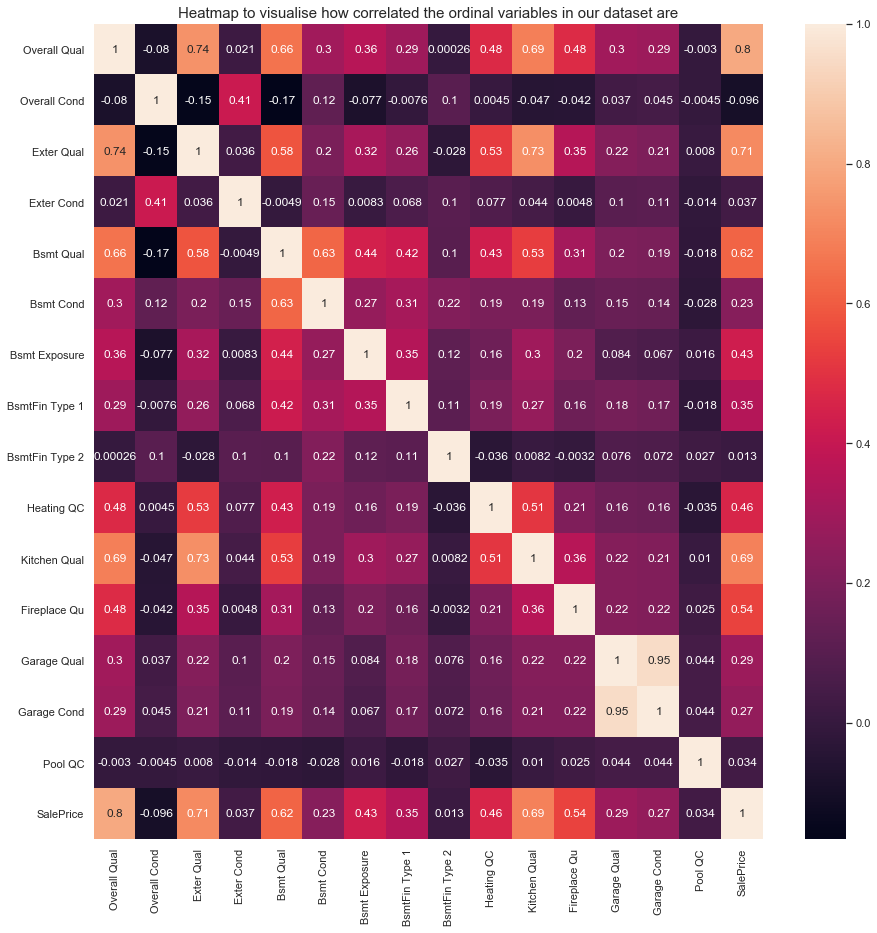

In [28]:
sns.set(font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(amesc_ord.corr(), annot = True);
plt.title("Heatmap to visualise how correlated the ordinal variables in our dataset are", fontsize=15);

In [29]:
ord_corr = abs(amesc_ord.corr()['SalePrice'])
ord_features = ord_corr[ord_corr>0.5]
ord_features

Overall Qual    0.803889
Exter Qual      0.714823
Bsmt Qual       0.617203
Kitchen Qual    0.694315
Fireplace Qu    0.539717
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [30]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    a = int(np.ceil(len(list_of_columns)/4))*8.5
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=dataframe.shape[0]*0.7, color='r')

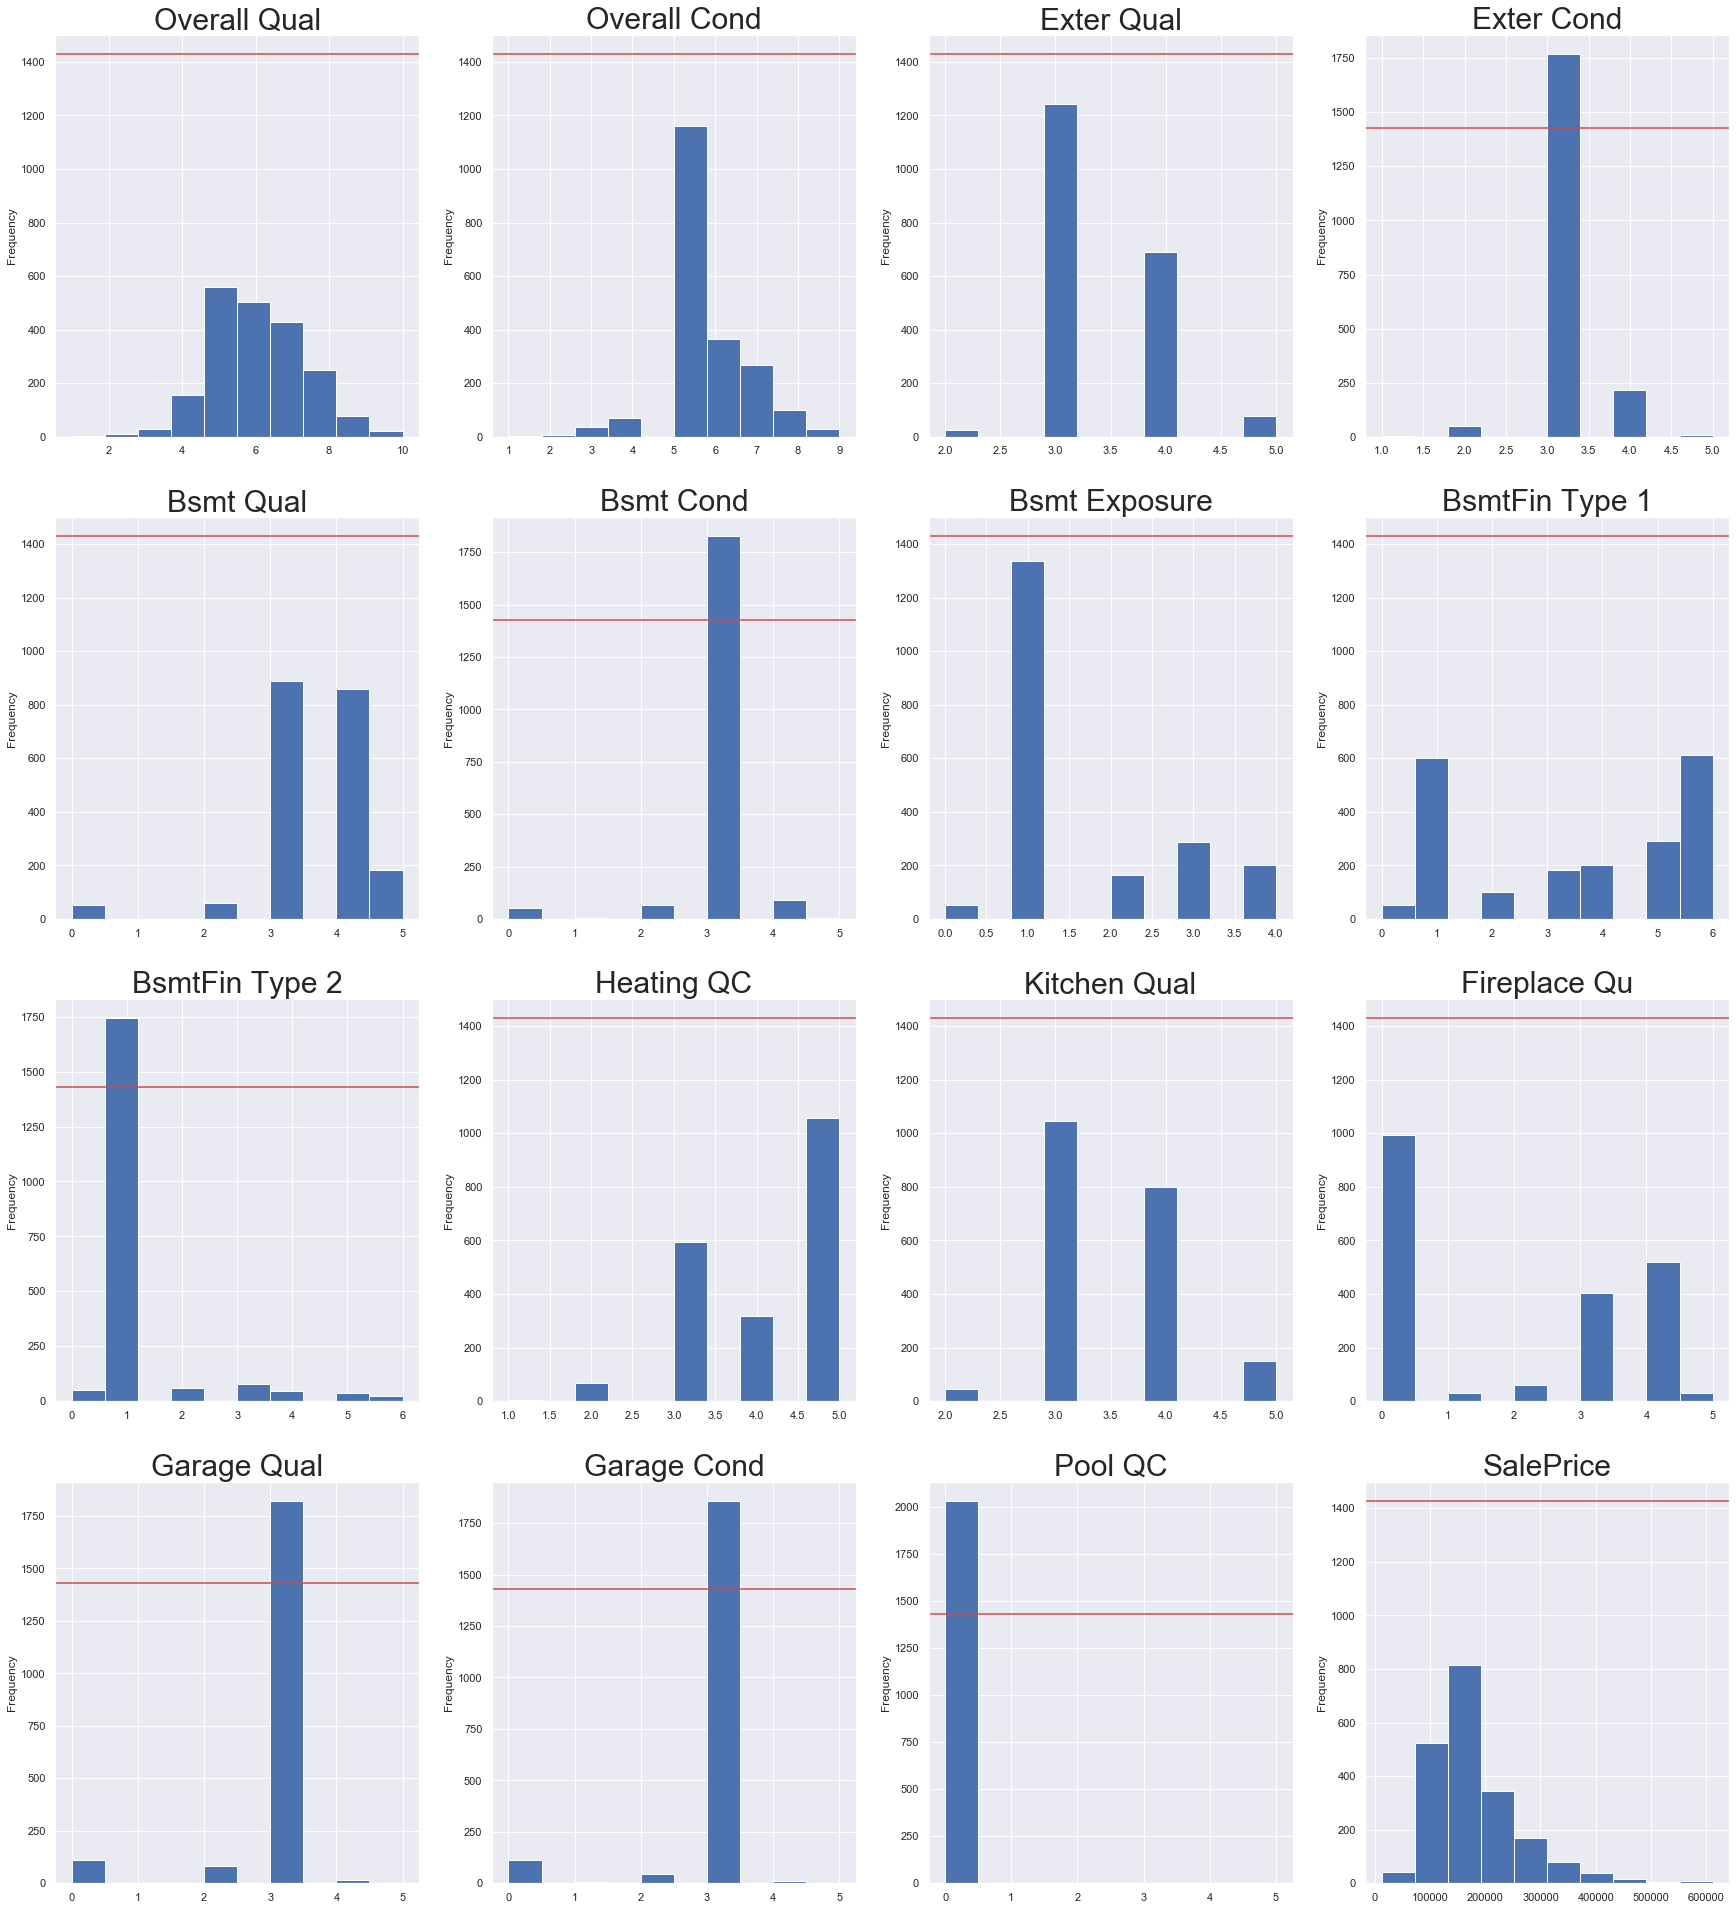

In [31]:
subplot_histograms(amesc_ord, amesc_ord.columns, amesc_ord.columns)

    Our heatmap correlation coefficients and histogram plots shows us that 
    the continuous variables to consider in generating our base model should be:
    - Overall Qual   
    - Exter Qual     
    - Bsmt Qual       
    - Kitchen Qual    
    - Fireplace Qu

**5. Find correlation for nominal data**

- Use association heatmap

In [32]:
amesc_nom.head(2)

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Electrical,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Paved Drive,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,SBrkr,0,0,2,1,3,1,6,Typ,0,Attchd,1976.0,RFn,2,Y,No fence,No Misc feature,3,2010,WD,130500.0
1,60,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,1,0,2,1,4,1,8,Typ,1,Attchd,1997.0,RFn,2,Y,No fence,No Misc feature,4,2009,WD,220000.0


    We have 46 columns of nominal data. Of these columns, some are date, some are discrete numbers which can be considered as discrete/ continuous data 
    - For finding correlation, I will: 
        1. Find the age of the house, thus removing 'Year Built'
        2. Create a binary column of Y for remodelling and N for no remodelling --> This will remove 'Year Remod/Add'
        3. Add up all the bathrooms to 1 num bathroom column --> Thus removing 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath' and 'Half Bath'
        4. Drop the column 'Garage Yr Blt' as it would take the year the house was built
        5. Drop the column 'Yr Sold' and replace it with resale or new house  

    1. Removing/ changing 'year' columns

In [33]:
amesc_nom.loc[amesc_nom['Year Remod/Add'] == 0 | amesc_nom['Year Remod/Add'].isnull(), ['Year Built','Year Remod/Add']]

,Year Built,Year Remod/Add


    Since all houses have undergone remodelling, we will take house age to be from year remodelled till now

In [34]:
amesc_nom['house age'] = amesc_nom['Yr Sold'] - amesc_nom['Year Remod/Add']
amesc_nom[['Year Built','Year Remod/Add','house age','Yr Sold']].sort_values(by ='house age')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year Built,Year Remod/Add,house age,Yr Sold
1711,2007,2008,-1,2007
190,2005,2006,0,2006
1203,2006,2006,0,2006
195,2005,2006,0,2006
196,2008,2009,0,2009
...,...,...,...,...
410,1896,1950,60,2010
561,1910,1950,60,2010
1298,1915,1950,60,2010
123,1927,1950,60,2010


In [35]:
amesc_nom['house age'].value_counts().sort_values().head()

-1      1
 24     5
 25     8
 26    10
 23    10
Name: house age, dtype: int64

In [36]:
len(amesc_nom[(amesc_nom['house age'] == -1) | (amesc_nom['house age'] == 0)])

160

(array([809., 302., 104., 239., 195., 392.]),
 array([-1.        ,  9.16666667, 19.33333333, 29.5       , 39.66666667,
        49.83333333, 60.        ]),
 <a list of 6 Patch objects>)

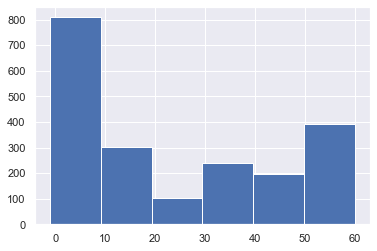

In [37]:
plt.hist(amesc_nom['house age'], bins=6)

    House age ranges from -1 years old to 60 years old --> I will be dividing them into 6 groups based on their age
        - Eg. age between 0 to 10 --> house sold within 10 years from remodelling --> group 1
              age between 50 to 50 --> house sold within 60 years from remodelling --> group 6
        - The only 1 observation which has a -1 value will be placed in group 1 as it has been remodelled within 1 year of purchase

In [38]:
# Binning the ages into 6 bins - changing 70 to bin 6
amesc_nom['house age group'] = abs((amesc_nom['house age'] // 10)) + 1
amesc_nom['house age group'].replace(7,6,inplace=True)
#amesc_nom['house age group'].replace(0,1,inplace = True)
amesc_nom['house age group'].value_counts()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    808
6    392
2    303
4    239
5    195
3    104
Name: house age group, dtype: int64

    Garage age

In [39]:
amesc_nom['Garage Yr Blt'].value_counts().head(3)

No Garage    113
2005.0       104
2007.0        83
Name: Garage Yr Blt, dtype: int64

In [40]:
amesc_nom['Garage Yr Blt'].replace('No Garage', 0,inplace=True)
amesc_nom['Garage Yr Blt'] = amesc_nom['Garage Yr Blt'].astype('float64')
amesc_nom['Garage Yr Blt'].dtype

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('float64')

In [41]:
# Finding how many percentage for Garage Yr Built vary from Year Built (of the house)
(len(amesc_nom.loc[amesc_nom['Garage Yr Blt'] != amesc_nom['Year Built'], ['Garage Yr Blt','Year Built']])/len(amesc_nom['Year Built']))*100

23.81185693287604

    Only 23% of Garage Year built/ remodelled differ from Year built of the house
        - As 23% is lower than the threshold I have set for skewness of data, I as take forgo the Year of the Garage and only take into account the Year built for the house 

    Combining all the bathroom columns to 1 total bath column

In [42]:
amesc_nom['total baths'] = amesc_nom['Bsmt Full Bath'] + 0.5*amesc_nom['Bsmt Half Bath'] + amesc_nom['Full Bath'] + 0.5*amesc_nom['Half Bath']
amesc_nom['total baths'].value_counts().head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2.0    633
2.5    388
1.0    314
3.0    277
3.5    200
Name: total baths, dtype: int64

    Combining number of rooms

In [43]:
# rooms = amesc_nom[['Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','SalePrice']]
# rooms_corr = abs(rooms.corr()['SalePrice'])
# sns.heatmap(rooms.corr(), annot = True)

    2. One hot encoding filtered nominal variables to fit into histogram
        - To eliminate variables with low variance

In [44]:
amesc_nomc = amesc_nom[['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style','Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Electrical','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Type','Garage Finish', 'Garage Cars', 'Paved Drive', 'Fence', 'Misc Feature',
       'Mo Sold','Sale Type','house age group', 'total baths','SalePrice']]

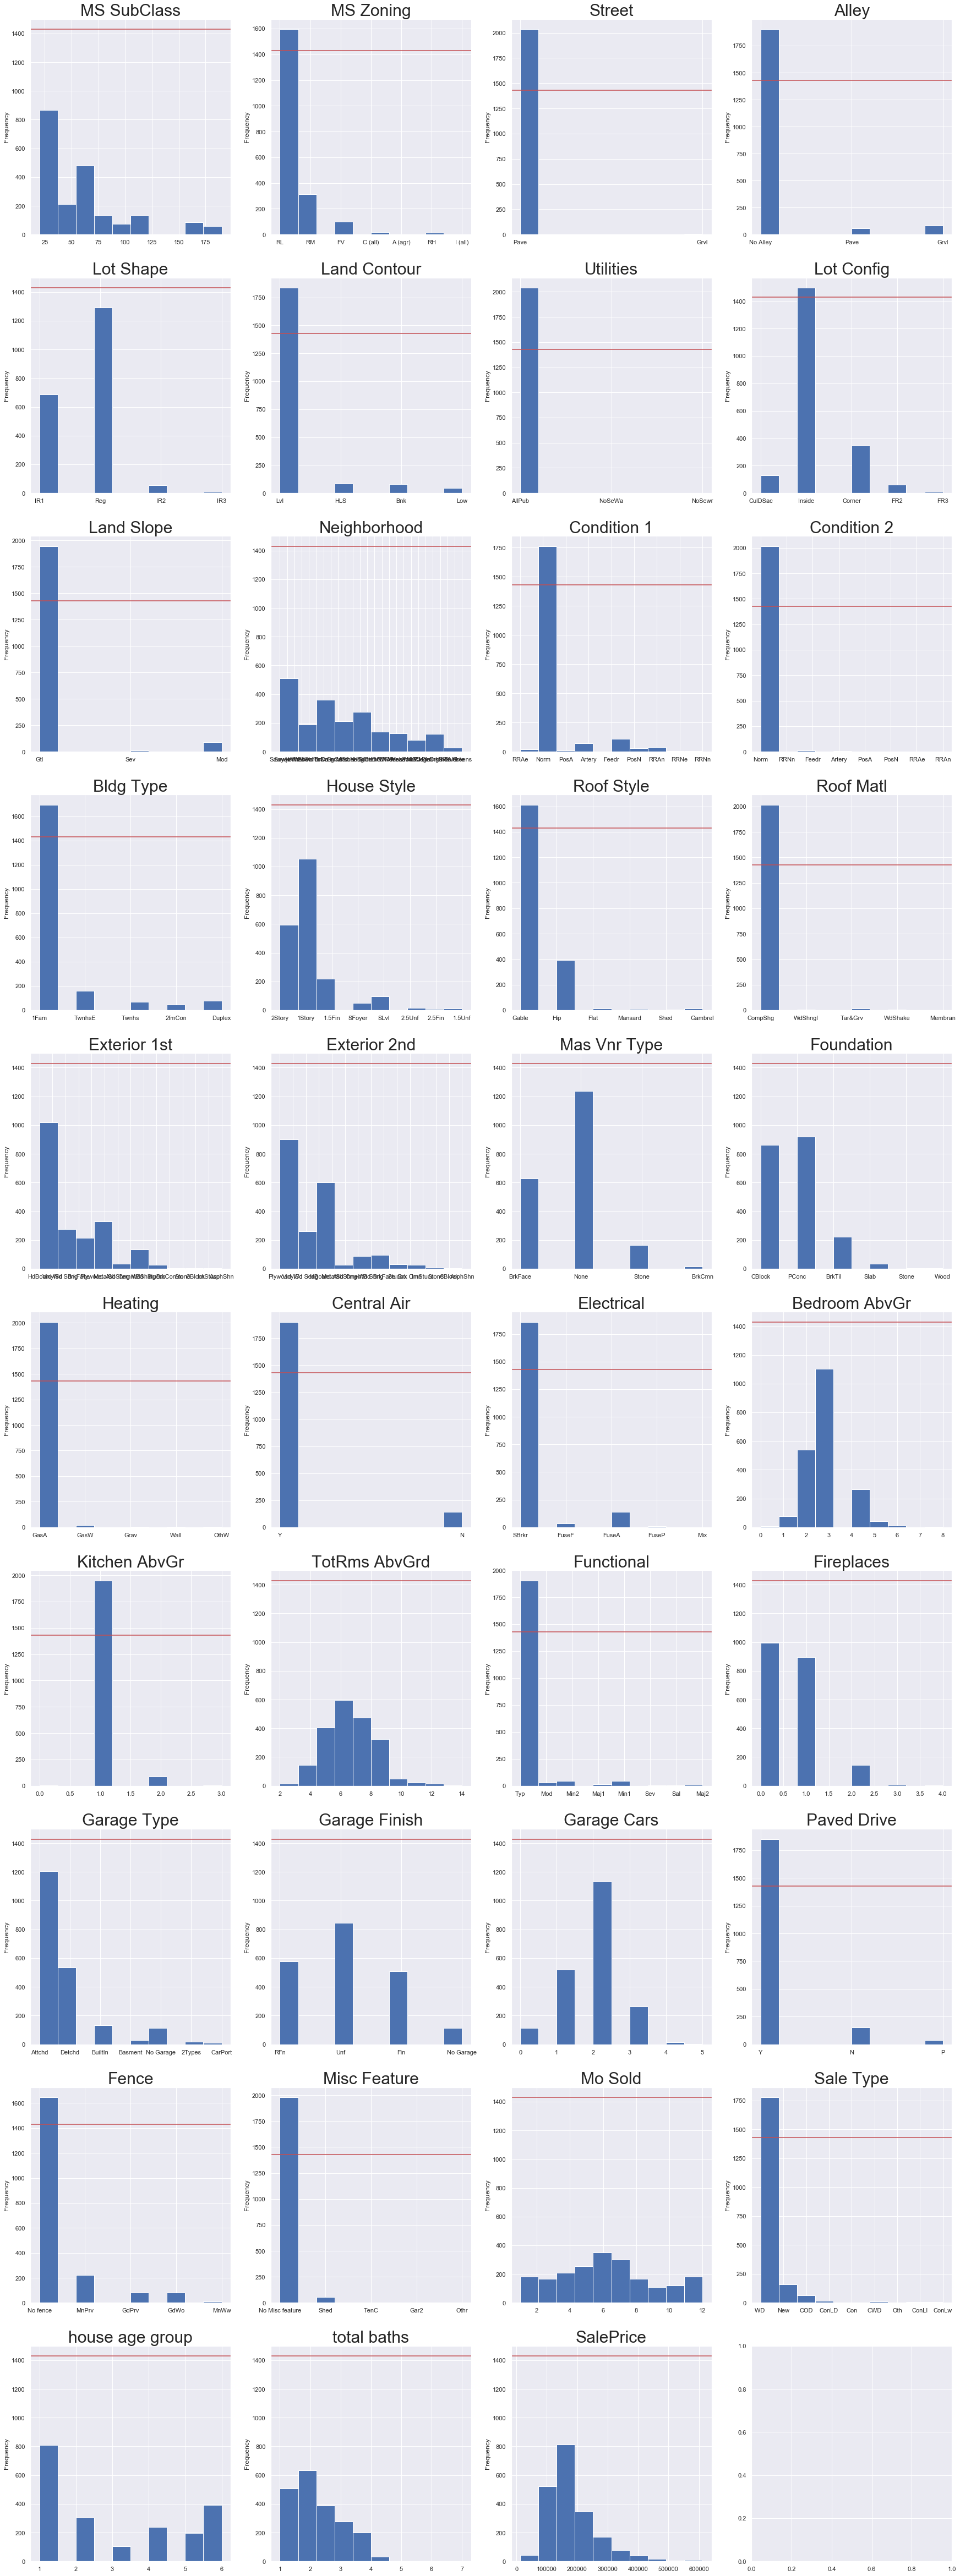

In [45]:
subplot_histograms(amesc_nomc, amesc_nomc.columns, amesc_nomc.columns)

In [46]:
amesc_nomc_togetdummy = amesc_nomc[['MS SubClass', 'Lot Shape', 'Neighborhood', 'House Style', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation','Bedroom AbvGr', 'TotRms AbvGrd', 
                                    'Fireplaces', 'Garage Type','Garage Finish', 'Garage Cars',
       'Mo Sold','house age group', 'total baths','SalePrice']]

In [47]:
amesc_nomc_togetdummy.columns[:-1]

Index(['MS SubClass', 'Lot Shape', 'Neighborhood', 'House Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
       'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Mo Sold', 'house age group',
       'total baths'],
      dtype='object')

In [48]:
d_amesc_nomc = pd.get_dummies(amesc_nomc_togetdummy, columns=amesc_nomc_togetdummy.columns[:-1])
d_amesc_nomc.head()

,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bedroom AbvGr_0,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,TotRms AbvGrd_2,TotRms AbvGrd_3,TotRms AbvGrd_4,TotRms AbvGrd_5,TotRms AbvGrd_6,TotRms AbvGrd_7,TotRms AbvGrd_8,TotRms AbvGrd_9,TotRms AbvGrd_10,TotRms AbvGrd_11,TotRms AbvGrd_12,TotRms AbvGrd_13,TotRms AbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Finish_Fin,Garage Finish_No Garage,Garage Finish_RFn,Garage Finish_Unf,Garage Cars_0,Garage Cars_1,Garage Cars_2,Garage Cars_3,Garage Cars_4,Garage Cars_5,Mo Sold_1,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,house age group_1,house age group_2,house age group_3,house age group_4,house age group_5,house age group_6,total baths_1.0,total baths_1.5,total baths_2.0,total baths_2.5,total baths_3.0,total baths_3.5,total baths_4.0,total baths_4.5,total baths_5.0,total baths_6.0,total baths_7.0
0,130500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,220000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,109000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,174000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [49]:
d_amesc_nomc.shape

(2041, 167)

**6. Pick features you want to use**

In [50]:
nom_features = d_amesc_nomc.drop(columns='SalePrice')
nom_features.head(2)

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bedroom AbvGr_0,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,TotRms AbvGrd_2,TotRms AbvGrd_3,TotRms AbvGrd_4,TotRms AbvGrd_5,TotRms AbvGrd_6,TotRms AbvGrd_7,TotRms AbvGrd_8,TotRms AbvGrd_9,TotRms AbvGrd_10,TotRms AbvGrd_11,TotRms AbvGrd_12,TotRms AbvGrd_13,TotRms AbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Finish_Fin,Garage Finish_No Garage,Garage Finish_RFn,Garage Finish_Unf,Garage Cars_0,Garage Cars_1,Garage Cars_2,Garage Cars_3,Garage Cars_4,Garage Cars_5,Mo Sold_1,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,house age group_1,house age group_2,house age group_3,house age group_4,house age group_5,house age group_6,total baths_1.0,total baths_1.5,total baths_2.0,total baths_2.5,total baths_3.0,total baths_3.5,total baths_4.0,total baths_4.5,total baths_5.0,total baths_6.0,total baths_7.0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [51]:
ord_features = amesc_ord[['Overall Qual','Exter Qual','Bsmt Qual','Kitchen Qual','Fireplace Qu']]
ord_features.head(2)

,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu
0,6,4,3,4,0
1,7,4,4,4,3


In [52]:
cont_features = amesc_cont[['Mas Vnr Area','Total Bsmt SF','1st Flr SF','Gr Liv Area','Garage Area']]
cont_features.head(2)

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,289.0,725.0,725.0,1479.0,475.0
1,132.0,913.0,913.0,2122.0,559.0


In [53]:
features = pd.concat([cont_features, ord_features, nom_features], axis=1, sort = False)

In [54]:
features.head()

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bedroom AbvGr_0,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,TotRms AbvGrd_2,TotRms AbvGrd_3,TotRms AbvGrd_4,TotRms AbvGrd_5,TotRms AbvGrd_6,TotRms AbvGrd_7,TotRms AbvGrd_8,TotRms AbvGrd_9,TotRms AbvGrd_10,TotRms AbvGrd_11,TotRms AbvGrd_12,TotRms AbvGrd_13,TotRms AbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Finish_Fin,Garage Finish_No Garage,Garage Finish_RFn,Garage Finish_Unf,Garage Cars_0,Garage Cars_1,Garage Cars_2,Garage Cars_3,Garage Cars_4,Garage Cars_5,Mo Sold_1,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,house age group_1,house age group_2,house age group_3,house age group_4,house age group_5,house age group_6,total baths_1.0,total baths_1.5,total baths_2.0,total baths_2.5,total baths_3.0,total baths_3.5,total baths_4.0,total baths_4.5,total baths_5.0,total baths_6.0,total baths_7.0
0,289.0,725.0,725.0,1479.0,475.0,6,4,3,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,132.0,913.0,913.0,2122.0,559.0,7,4,4,4,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,1057.0,1057.0,1057.0,246.0,5,3,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0

In [55]:
target = amesc_cont['SalePrice']

**7. Model**

    1. Linear Regression

In [56]:
X_train = features
y_train = target

In [57]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)

In [58]:
lr = LinearRegression()

In [59]:
cross_val_score(lr,X_train_ss, y_train, cv = 5).mean()

-6.530851615964112e+24

    2. Regularise - ridge

In [60]:
alpha_vals = np.logspace(-3,3,50)
ridge_cv = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_ss,y_train)
best_alpha1 = ridge_cv.alpha_
best_alpha1

184.20699693267164

In [61]:
best_ridge = Ridge(alpha=best_alpha1)
cross_val_score(best_ridge,X_train_ss,y_train,cv=3).mean()

0.8884570099944348

    3. Regularise - lasso

In [62]:
lasso_cv = LassoCV(alphas=alpha_vals,cv=3)
lasso_cv.fit(X_train_ss,y_train)
best_alpha2 = lasso_cv.alpha_
best_alpha2

429.1934260128778

In [63]:
best_lasso = Lasso(alpha=best_alpha2)
cross_val_score(best_lasso,X_train_ss,y_train,cv=3).mean()

0.8907645884952643

    4. Regulaise - elasticnet

In [64]:
elasticnet_cv = ElasticNetCV(alphas=alpha_vals,cv=5)
elasticnet_cv.fit(X_train_ss,y_train)
best_alpha3 = elasticnet_cv.alpha_
best_alpha3

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1551413114.7249756, tolerance: 1024876333.922232
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11389088170.366577, tolerance: 1024876333.922232
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8185743702.625732, tolerance: 1024876333.922232
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17761695791.58313, tolerance: 998010699.7748065
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85251694131.48224, tolerance: 998010699.7748065
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174022155771.84753, tolerance: 998010699.7748065
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

0.21209508879201905

In [65]:
best_elasticnet = ElasticNet(alpha=best_alpha3)
cross_val_score(best_elasticnet,X_train_ss,y_train,cv=3).mean()

0.8883596634580105

    Using Lasso regression to further eliminate features

In [66]:
lasso_model = Lasso(alpha = best_alpha2)

In [72]:
lasso_r2_mean = cross_val_score(lasso_model, X_train_ss, y_train, cv=3, scoring = 'r2').mean()
lasso_mse_mean = -cross_val_score(lasso_model, X_train_ss, y_train, cv=3, scoring = 'neg_mean_squared_error').mean()
print(lasso_r2_mean, lasso_mse_mean)

0.8907645884952643 687046051.9012022


In [73]:
lasso_model.fit(X_train_ss,y_train)

Lasso(alpha=429.1934260128778, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

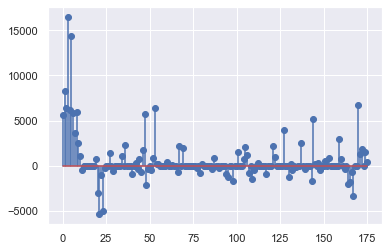

In [74]:
plt.stem(lasso_model.coef_)

In [75]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns)

In [76]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 92 variables and eliminated the other 84 variables


In [77]:
coef[coef != 0].head()

Mas Vnr Area      5652.732926
Total Bsmt SF     8327.298019
1st Flr SF        6363.016657
Gr Liv Area      16502.694525
Garage Area       6174.176127
dtype: float64

In [224]:
coef[coef != 0].index

Index(['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Garage Area', 'Overall Qual', 'Exter Qual', 'Bsmt Qual',
       'Kitchen Qual', 'Fireplace Qu', 'MS SubClass_20', 'MS SubClass_30',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'House Style_2.5Unf',
       'House Style_SLvl', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace',
       'Exterior 1st_CemntBd', 'Exterior 1st_Wd 

In [79]:
#abs(coef).describe()

In [80]:
ef = coef.describe(percentiles=[0.1,0.5,0.9])
print(ef[4],ef[6])
ef

-770.1317241281076 2245.5902854068727


count      176.000000
mean       561.048294
std       2416.751963
min      -5393.580435
10%       -770.131724
50%          0.000000
90%       2245.590285
max      16502.694525
dtype: float64

**7.1 Extract features**

(24,)


Text(0.5, 1.0, 'Coefficients in the Lasso Model for each variable')

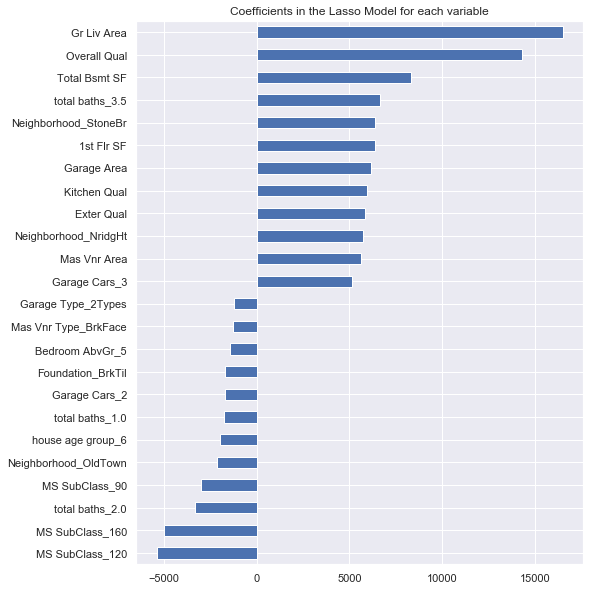

In [81]:
# imp_coef = coef[(coef > ef[6]) | (coef < -ef[6])].sort_values()
imp_coef = pd.concat([coef.sort_values().head(12),
                     coef.sort_values().tail(12)])
print(imp_coef.shape)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model for each variable")

In [82]:
imp_coef.head()

MS SubClass_120        -5393.580435
MS SubClass_160        -4993.959603
total baths_2.0        -3327.913617
MS SubClass_90         -2979.277732
Neighborhood_OldTown   -2166.341442
dtype: float64

In [83]:
ex_features = imp_coef.index
ex_features.shape

(24,)

**7.2 Model with extracted features**

In [86]:
features_l1 = features[ex_features]
features_l1.shape

(2041, 24)

    1. Linear Regression

In [87]:
X_train_l1 = features_l1
y_train = target

In [88]:
ss = StandardScaler()
ss.fit(X_train_l1)
X_train_l1ss = ss.transform(X_train_l1)

In [186]:
lrl1 = LinearRegression()

In [187]:
cross_val_score(lrl1,X_train_l1ss, y_train, cv = 5).mean()

0.8839800172568468

    2. Regularise - ridge

In [91]:
alpha_vals = np.logspace(-3,3,50)
ridge_cv = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_l1ss,y_train)
best_alpha1l1 = ridge_cv.alpha_
best_alpha1l1

44.98432668969444

In [92]:
best_ridgel1 = Ridge(alpha=best_alpha1l1)
cross_val_score(best_ridgel1,X_train_l1ss,y_train,cv=3).mean()

0.8836275843175289

    3. Regularise - lasso

In [93]:
lasso_cv = LassoCV(alphas=alpha_vals,cv=3)
lasso_cv.fit(X_train_l1ss,y_train)
best_alpha2l1 = lasso_cv.alpha_
best_alpha2l1

25.595479226995334

In [94]:
best_lassol1 = Lasso(alpha=best_alpha2l1)
cross_val_score(best_lassol1,X_train_l1ss,y_train,cv=3).mean()

0.8834824615469747

    4. Regularise - elasticnet

In [95]:
elasticnet_cv = ElasticNetCV(alphas=alpha_vals,cv=5)
elasticnet_cv.fit(X_train_l1ss,y_train)
best_alpha3l1 = elasticnet_cv.alpha_
best_alpha3l1

0.06866488450043001

In [96]:
best_elasticnetl1 = ElasticNet(alpha=best_alpha3l1)
cross_val_score(best_elasticnetl1,X_train_l1ss,y_train,cv=3).mean()

0.8836276199154375

    Since the lrl1 model has the highest R^2 value, I will be using that to predict my Y test values

In [190]:
lrl1.fit(X_train_l1ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
cross_val_score(lrl1,X_train_l1ss, y_train, cv = 5).mean()

0.8839800172568468

**8. Test data**

    Test variables to be fed into the model based on their type  

|Continuous|Nominal|Ordinal|
|---|---|---|
|Gr Liv Area|total baths_3.5|Overall Qual|
|Total Bsmt SF|Neighborhood_StoneBr|Kitchen Qual|
|1st Flr SF|Neighborhood_NridgHt|Exter Qual|
|Garage Area|Garage Cars_3| |
|Mas Vnr Area|Garage Type_2Types| |
| |Mas Vnr Type_BrkFace| |
| |Bedroom AbvGr_5| |
| |Foundation_BrkTil||
| |house age group_6| |
| |Garage Cars_2| |
| |Neighborhood_OldTown| |
| |total baths_1.0| |
| |total baths_2.0| |
| |MS SubClass_90| |
| |MS SubClass_120| |
| |MS SubClass_160| |

In [97]:
print(len(ex_features))

sep = '_'
list_var = []
for i in ex_features:
    list_var.append(i.split(sep, 1)[0])

print(len(list_var))
list_var[:5]

24
24


['MS SubClass', 'MS SubClass', 'total baths', 'MS SubClass', 'Neighborhood']

In [98]:
list_varu = []
for i in list_var:
    if i not in list_varu:
        list_varu.append(i)

list_varu.remove('total baths')
list_varu.remove('house age group')

In [99]:
print(len(list_varu))
list_varu

15


['MS SubClass',
 'Neighborhood',
 'Garage Cars',
 'Foundation',
 'Bedroom AbvGr',
 'Mas Vnr Type',
 'Garage Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Kitchen Qual',
 'Garage Area',
 '1st Flr SF',
 'Total Bsmt SF',
 'Overall Qual',
 'Gr Liv Area']

    This above is the list of features we will be using from the test dataset to test our model 

    1. Load test data

In [100]:
ames_test = pd.read_csv("./datasets/test.csv")
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [101]:
test_variables = ames_test[list_varu]
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Foundation,Bedroom AbvGr,Mas Vnr Type,Garage Type,Mas Vnr Area,Exter Qual,Kitchen Qual,Garage Area,1st Flr SF,Total Bsmt SF,Overall Qual,Gr Liv Area
0,190,OldTown,1,Stone,4,None,Detchd,0.0,TA,Fa,440,908,1020,6,1928
1,90,Sawyer,2,CBlock,6,None,Attchd,0.0,TA,TA,580,1967,1967,5,1967
2,60,Gilbert,2,PConc,3,None,Attchd,0.0,Gd,Gd,426,664,654,7,1496
3,30,OldTown,2,CBlock,2,None,Detchd,0.0,Gd,TA,480,968,968,5,968
4,20,NAmes,2,CBlock,3,BrkFace,Attchd,247.0,TA,TA,514,1394,1394,6,1394


    2. Clean test data - especially the variables to be fed into the model

In [102]:
test_variables.dtypes

MS SubClass        int64
Neighborhood      object
Garage Cars        int64
Foundation        object
Bedroom AbvGr      int64
Mas Vnr Type      object
Garage Type       object
Mas Vnr Area     float64
Exter Qual        object
Kitchen Qual      object
Garage Area        int64
1st Flr SF         int64
Total Bsmt SF      int64
Overall Qual       int64
Gr Liv Area        int64
dtype: object

In [103]:
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(test_variables)

Mas Vnr Type: 1 null values
Garage Type: 44 null values
Mas Vnr Area: 1 null values


    Cleaning Mas Vnr Type and Area

In [104]:
ames_test[ames_test['Mas Vnr Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
866,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,885,0,1725,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2,550,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD


    During our data cleaning, we considered Mas Vnr Type that had a null values of not having a masonry veneer ('None') and as such, area = 0. We will apply the same considerations here too

In [105]:
test_variables['Mas Vnr Type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [109]:
test_variables['Mas Vnr Area'].value_counts()

0.0       532
216.0       7
80.0        5
196.0       5
420.0       5
340.0       4
144.0       4
120.0       4
176.0       3
50.0        3
149.0       3
302.0       3
270.0       3
194.0       3
306.0       3
128.0       3
456.0       3
240.0       3
200.0       3
90.0        3
198.0       3
88.0        3
180.0       3
285.0       3
182.0       3
156.0       2
423.0       2
147.0       2
206.0       2
161.0       2
53.0        2
82.0        2
450.0       2
162.0       2
153.0       2
305.0       2
104.0       2
215.0       2
320.0       2
232.0       2
265.0       2
256.0       2
352.0       2
164.0       2
252.0       2
300.0       2
70.0        2
246.0       2
226.0       2
166.0       2
44.0        2
130.0       2
621.0       2
280.0       2
150.0       2
16.0        2
76.0        2
108.0       2
174.0       2
72.0        2
45.0        2
360.0       2
100.0       2
268.0       2
169.0       2
266.0       2
209.0       2
99.0        2
205.0       2
14.0        2
178.0       2
350.0 

In [110]:
test_variables['Mas Vnr Type'].fillna('None',inplace=True)
test_variables['Mas Vnr Area'].fillna(0, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [111]:
test_variables['Mas Vnr Area'].value_counts()

0.0       533
216.0       7
80.0        5
196.0       5
420.0       5
340.0       4
144.0       4
120.0       4
176.0       3
50.0        3
149.0       3
302.0       3
270.0       3
194.0       3
306.0       3
128.0       3
456.0       3
240.0       3
200.0       3
90.0        3
198.0       3
88.0        3
180.0       3
285.0       3
182.0       3
156.0       2
423.0       2
147.0       2
206.0       2
161.0       2
53.0        2
82.0        2
450.0       2
162.0       2
153.0       2
305.0       2
104.0       2
215.0       2
320.0       2
232.0       2
265.0       2
256.0       2
352.0       2
164.0       2
252.0       2
300.0       2
70.0        2
246.0       2
226.0       2
166.0       2
44.0        2
130.0       2
621.0       2
280.0       2
150.0       2
16.0        2
76.0        2
108.0       2
174.0       2
72.0        2
45.0        2
360.0       2
100.0       2
268.0       2
169.0       2
266.0       2
209.0       2
99.0        2
205.0       2
14.0        2
178.0       2
350.0 

    Cleaning Bsmt Qual

In [ ]:
# ames_test[ames_test['Bsmt Qual'].isnull()].head()

    From filtering Bsmt Qual, we are able to see that observations having a null value would be observations with no basemen. As per my training data cleaning methodology, I will be filling them with 0 

In [ ]:
# test_variables['Bsmt Qual'].value_counts()

In [ ]:
# test_variables['Bsmt Qual'].fillna(0,inplace=True)

In [ ]:
# test_variables['Bsmt Qual'].value_counts()

    Cleaning Garage Type

In [112]:
ames_test[ames_test['Garage Type'].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
29,1904,534451020,50,RL,51.0,3500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,144,Unf,0,226,370,GasA,TA,N,FuseA,442,228,0,670,1,0,1,0,2,1,Fa,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,21,0,0,0,0,NaN,MnPrv,Shed,2000,7,2007,WD
45,979,923228150,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,2008,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,798,546,0,1344,0,0,1,1,3,1,TA,6,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD
66,2362,527403120,20,RL,NaN,8125,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,4,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,614,Unf,0,244,858,GasA,TA,Y,SBrkr,858,0,0,858,0,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD
68,2188,908226180,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,3,6,1931,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,544,Unf,0,0,544,GasA,Ex,Y,SBrkr,774,0,0,774,0,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,286,0,0,0,NaN,NaN,NaN,0,5,2007,WD
106,1988,902207010,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,9,1945,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,329,Unf,0,357,686,GasA,Gd,Y,SBrkr,866,0,0,866,0,0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,58,42,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD


    Filtering Garage Type null values, we are able to see that those observations correspond to observation that do not have a Garage. As such just as my train data cleaning methodology, I will be changing null values here to 'No Garage'

In [113]:
test_variables['Garage Type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     54
Basment      9
2Types       4
CarPort      4
Name: Garage Type, dtype: int64

In [114]:
test_variables['Garage Type'].fillna('No Garage', inplace=True)

In [115]:
test_variables['Garage Type'].value_counts()

Attchd       518
Detchd       246
BuiltIn       54
No Garage     44
Basment        9
2Types         4
CarPort        4
Name: Garage Type, dtype: int64

In [116]:
Get_null_vals(test_variables)

In [119]:
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Foundation,Bedroom AbvGr,Mas Vnr Type,Garage Type,Mas Vnr Area,Exter Qual,Kitchen Qual,Garage Area,1st Flr SF,Total Bsmt SF,Overall Qual,Gr Liv Area
0,190,OldTown,1,Stone,4,None,Detchd,0.0,TA,Fa,440,908,1020,6,1928
1,90,Sawyer,2,CBlock,6,None,Attchd,0.0,TA,TA,580,1967,1967,5,1967
2,60,Gilbert,2,PConc,3,None,Attchd,0.0,Gd,Gd,426,664,654,7,1496
3,30,OldTown,2,CBlock,2,None,Detchd,0.0,Gd,TA,480,968,968,5,968
4,20,NAmes,2,CBlock,3,BrkFace,Attchd,247.0,TA,TA,514,1394,1394,6,1394


    3. Convert each variable to its associated data type 

In [118]:
clean_ord_list = []
for i in test_variables.columns:
    if i in amesc_ord.columns:
        clean_ord_list.append(i)
        
clean_ord_list

['Exter Qual', 'Kitchen Qual', 'Overall Qual']

In [120]:
test_variables[clean_ord_list].head()

,Exter Qual,Kitchen Qual,Overall Qual
0,TA,Fa,6
1,TA,TA,5
2,Gd,Gd,7
3,Gd,TA,5
4,TA,TA,6


    We first have to convert string values of ordinal values to numerical form - label encoding

In [121]:
cat_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for i in test_variables[clean_ord_list].columns:
    if ('Overall' not in i) & ('Qual' in i):
        test_variables[i].replace(cat_dict,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [123]:
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Foundation,Bedroom AbvGr,Mas Vnr Type,Garage Type,Mas Vnr Area,Exter Qual,Kitchen Qual,Garage Area,1st Flr SF,Total Bsmt SF,Overall Qual,Gr Liv Area
0,190,OldTown,1,Stone,4,None,Detchd,0.0,3,2,440,908,1020,6,1928
1,90,Sawyer,2,CBlock,6,None,Attchd,0.0,3,3,580,1967,1967,5,1967
2,60,Gilbert,2,PConc,3,None,Attchd,0.0,4,4,426,664,654,7,1496
3,30,OldTown,2,CBlock,2,None,Detchd,0.0,4,3,480,968,968,5,968
4,20,NAmes,2,CBlock,3,BrkFace,Attchd,247.0,3,3,514,1394,1394,6,1394


    Next, change the data type for ordinal, continuous and nominal data

In [153]:
#test_variables.columns

In [154]:
#amesc_cont.columns

In [155]:
#amesc_ord.columns

In [156]:
#d_amesc_nomc.columns

In [157]:
#amesc_nomc.columns

In [130]:
for i in test_variables.columns:
    if i in amesc_cont.columns:
        test_variables[i] = test_variables[i].astype('float')
    elif i in amesc_ord.columns:
        test_variables[i] = test_variables[i].astype('int')
    elif i in amesc_nomc.columns:
        test_variables[i] = test_variables[i].astype('str')
        
test_variables.dtypes

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

MS SubClass       object
Neighborhood      object
Garage Cars       object
Foundation        object
Bedroom AbvGr     object
Mas Vnr Type      object
Garage Type       object
Mas Vnr Area     float64
Exter Qual         int32
Kitchen Qual       int32
Garage Area      float64
1st Flr SF       float64
Total Bsmt SF    float64
Overall Qual       int32
Gr Liv Area      float64
dtype: object

    Now, create 'house age group' and 'total baths' columns 

In [136]:
ames_test[['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Yr Sold','Year Remod/Add']].dtypes

Bsmt Full Bath    int64
Bsmt Half Bath    int64
Full Bath         int64
Half Bath         int64
Yr Sold           int64
Year Remod/Add    int64
dtype: object

In [147]:
test_variables['total baths'] = ames_test['Bsmt Full Bath'] + 0.5*ames_test['Bsmt Half Bath'] + ames_test['Full Bath'] + 0.5*ames_test['Half Bath']
test_variables['house age'] = ames_test['Yr Sold'] - ames_test['Year Remod/Add']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
test_variables['house age group'] = abs((test_variables['house age'] // 10)) + 1
test_variables['house age group'].replace(7,6,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
test_variables['house age group'].value_counts()

1    334
6    151
2    135
4    110
5     83
3     66
Name: house age group, dtype: int64

In [151]:
test_variables['Id'] = ames_test['Id']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Foundation,Bedroom AbvGr,Mas Vnr Type,Garage Type,Mas Vnr Area,Exter Qual,Kitchen Qual,Garage Area,1st Flr SF,Total Bsmt SF,Overall Qual,Gr Liv Area,total baths,house age,house age group,Id
0,190,OldTown,1,Stone,4,None,Detchd,0.0,3,2,440.0,908.0,1020.0,6,1928.0,2.0,56,6,2658
1,90,Sawyer,2,CBlock,6,None,Attchd,0.0,3,3,580.0,1967.0,1967.0,5,1967.0,2.0,29,3,2718
2,60,Gilbert,2,PConc,3,None,Attchd,0.0,4,4,426.0,664.0,654.0,7,1496.0,3.5,0,1,2414
3,30,OldTown,2,CBlock,2,None,Detchd,0.0,4,3,480.0,968.0,968.0,5,968.0,1.0,1,1,1989
4,20,NAmes,2,CBlock,3,BrkFace,Attchd,247.0,3,3,514.0,1394.0,1394.0,6,1394.0,2.5,46,5,625


    One hot encode nominal variables 

In [160]:
testvar_to_dummy = []
for i in test_variables.columns:
    if i in amesc_nomc:
        testvar_to_dummy.append(i)
        
testvar_to_dummy

['MS SubClass',
 'Neighborhood',
 'Garage Cars',
 'Foundation',
 'Bedroom AbvGr',
 'Mas Vnr Type',
 'Garage Type',
 'total baths',
 'house age group']

In [163]:
test_variables_d = pd.get_dummies(test_variables, columns=testvar_to_dummy)

In [164]:
test_variables_d.shape

(879, 97)

In [165]:
ex_features

Index(['MS SubClass_120', 'MS SubClass_160', 'total baths_2.0',
       'MS SubClass_90', 'Neighborhood_OldTown', 'house age group_6',
       'total baths_1.0', 'Garage Cars_2', 'Foundation_BrkTil',
       'Bedroom AbvGr_5', 'Mas Vnr Type_BrkFace', 'Garage Type_2Types',
       'Garage Cars_3', 'Mas Vnr Area', 'Neighborhood_NridgHt', 'Exter Qual',
       'Kitchen Qual', 'Garage Area', '1st Flr SF', 'Neighborhood_StoneBr',
       'total baths_3.5', 'Total Bsmt SF', 'Overall Qual', 'Gr Liv Area'],
      dtype='object')

In [171]:
test_features = test_variables_d[ex_features]

In [172]:
test_features['Id'] = test_variables_d['Id']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
test_features.head()

,MS SubClass_120,MS SubClass_160,total baths_2.0,MS SubClass_90,Neighborhood_OldTown,house age group_6,total baths_1.0,Garage Cars_2,Foundation_BrkTil,Bedroom AbvGr_5,Mas Vnr Type_BrkFace,Garage Type_2Types,Garage Cars_3,Mas Vnr Area,Neighborhood_NridgHt,Exter Qual,Kitchen Qual,Garage Area,1st Flr SF,Neighborhood_StoneBr,total baths_3.5,Total Bsmt SF,Overall Qual,Gr Liv Area,Id
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0.0,0,3,2,440.0,908.0,0,0,1020.0,6,1928.0,2658
1,0,0,1,1,0,0,0,1,0,0,0,0,0,0.0,0,3,3,580.0,1967.0,0,0,1967.0,5,1967.0,2718
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,4,4,426.0,664.0,0,1,654.0,7,1496.0,2414
3,0,0,0,0,1,0,1,1,0,0,0,0,0,0.0,0,4,3,480.0,968.0,0,0,968.0,5,968.0,1989
4,0,0,0,0,0,0,0,1,0,0,1,0,0,247.0,0,3,3,514.0,1394.0,0,0,1394.0,6,1394.0,625


    3. Predict Sale Price using test variables 
    - save it as a dataframe

In [184]:
X_test = test_features[ex_features]
X_test.shape

(879, 24)

In [189]:
ss1 = StandardScaler()

In [185]:
X_test_ss = ss1.transform(X_test)

In [199]:
pred = lrl1.predict(X_test_ss)
pred = np.round(pred,2)
pred

array([143052.06, 188394.26, 208719.9 , 125170.08, 180927.87,  80058.31,
       106012.14, 166813.16, 177574.41, 167031.97, 162116.13, 136498.57,
       160136.18, 222636.38, 156898.62, 117876.98, 139582.34, 124926.83,
       192035.94, 196124.26, 140805.03, 122814.9 , 205569.24, 136655.78,
       203215.69, 117723.54, 135986.79, 150198.89, 147646.85,  35628.73,
       116900.58, 110196.08, 262211.44, 150206.42, 215210.29, 161117.61,
       118310.18,  50049.44, 124371.75, 205962.75, 140518.21, 211883.61,
       162440.44, 162285.3 , 205214.33,  85404.13, 234690.06, 119384.84,
       120381.96, 138563.16, 107904.05, 222368.64, 272854.18, 151744.67,
       111942.69, 149209.41, 182327.78, 151978.47, 164102.23, 270566.05,
       321432.88, 130269.34, 144561.55, 175493.66, 184873.09, 327574.35,
        94464.28, 211689.01,  75267.09, 127282.99,  81728.4 , 346880.18,
       203998.85, 173923.06, 138580.93, 210285.79, 537601.32, 139196.47,
       167078.01,  97437.08, 363534.85, 206486.71, 

In [217]:
predictions = pd.DataFrame(pred)
predictions['Id'] = ames_test['Id']
predictions.head()

,0,Id
0,143052.06,2658
1,188394.26,2718
2,208719.90,2414
3,125170.08,1989
4,180927.87,625


In [220]:
predictions.rename(columns = {0:'SalePrice'}, inplace = True)
predictions.head()

,Id,SalePrice
0,2658,143052.06
1,2718,188394.26
2,2414,208719.90
3,1989,125170.08
4,625,180927.87


In [221]:
predictions = predictions[['Id','SalePrice']]
predictions

,Id,SalePrice
0,2658,143052.06
1,2718,188394.26
2,2414,208719.90
3,1989,125170.08
4,625,180927.87
5,333,80058.31
6,1327,106012.14
7,858,166813.16
8,95,177574.41
9,1568,167031.97


In [222]:
predictions.to_csv('ames_predictions.csv', index=False)